In [3]:
!pip install PyPDF2

In [ ]:
# 1. Read in Resume

In [3]:
import  PyPDF2 


In [4]:
resume_file_path = 'Resume PAth'
fhandle = open(resume_file_path, 'rb')

In [5]:
pdfReader = PyPDF2.PdfFileReader(fhandle)

In [6]:
pagehandle = pdfReader.getPage(0)

In [7]:
text = pagehandle.extractText()

In [8]:
# Strip out unwanted text
text = text.replace('o ','')
text = text.replace('|', '')

In [9]:
text

'!"#$%&&\'(!)*+$\n!,-./012(&3453221\n!,-./012(&3453221(/5.6(0(7.1,34(289:0.5,30;(\n<0:=41,938(53(>?@A)(038(B0.0(!:523:2C()(.0=2(\nD1582(53(EF(/,1=(038(;5=2(;2013534(32/(.65347C(\n)3.2127.28(.,(9.5;5G2(EF(0<5;5.527H(2ID21523:2H(038(\n7=5;;7(53(53-,1E0.5,3(.2:63,;,4FC\nJ22175346KLMNO4E05;C:,E\nKPKKNMNPNQB2;65H()3850\n///C3291.6C:,E\n;53=2853C:,E@53@J22175346KPKK\n45.69<C:,E@J22175346KLMN\n!"#$%&\'()\n!"#$%&\'()\'*)+,-.,%%(.,-)/!+0\nBF(R0.5;()37.5.9.2(,-(&3453221534(038(S2:6C(\nTR932("35J2175.FU\nVNQW(X(VNVQWCYZ(!+RA\n[,ED9.21(&3453221534\n1%,.\'()1%#\',2"(3)/45670\n?0IE5(R9<;5:(!1(!2:C(!:6,,;(H*2/(B2;65\nR6F75:7(H[62E57.1FH(>0.67(H([,ED9.21(!:523:2(H&34;576(\nVNQL(X(VNQWWWCY(\\\n*+\',,*\nJavascript-(.+/!01!.\'!)$!/\n89&&):;"#<)=%>%&\'?%()@)A%"#;):?%#."&.:;\n*291.6C:,E\nNP@VNVN](R12723.\n!"#$%&\'()$"*+,-."$/$01*2*3,%4)-,5\nAchievements/Tasks\n^>082(0([60._`S(97534()_>(a0.7,3(A7757.03.(AR)(\n^>082(0(/6,;2(%582,([,3-2123:2(ADD(97534(\n-10E2/,1=7(;5=2(R221Cb7(H(/2<\'S[(H7,:=2.C5,(\n^>082(0(>

In [10]:
# 2. Import and Authenticate to Service

In [11]:
# Import Watson
from ibm_watson import PersonalityInsightsV3

# Import authenticator
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [12]:
#  Creds for Personality Insights
apikey = 'API KEY'
url = 'URL'

In [13]:
# Authenticate to PI service
authenticator = IAMAuthenticator(apikey)
personality_insights = PersonalityInsightsV3(
        version='2017-10-13', 
        authenticator=authenticator
)
personality_insights.set_service_url(url)

In [14]:
# 3. Extract Resume Personality Insights

In [15]:
profile = personality_insights.profile(text, accept='application/json').get_result()
profile

{'word_count': 253,
 'word_count_message': 'There were 253 words in the input. We need a minimum of 600, preferably 1,200 or more, to compute statistically significant estimates',
 'processed_language': 'en',
 'personality': [{'trait_id': 'big5_openness',
   'name': 'Openness',
   'category': 'personality',
   'percentile': 0.15353607994894375,
   'significant': True,
   'children': [{'trait_id': 'facet_adventurousness',
     'name': 'Adventurousness',
     'category': 'personality',
     'percentile': 0.3265878176898197,
     'significant': True},
    {'trait_id': 'facet_artistic_interests',
     'name': 'Artistic interests',
     'category': 'personality',
     'percentile': 0.580983124584181,
     'significant': True},
    {'trait_id': 'facet_emotionality',
     'name': 'Emotionality',
     'category': 'personality',
     'percentile': 0.5268824602129961,
     'significant': True},
    {'trait_id': 'facet_imagination',
     'name': 'Imagination',
     'category': 'personality',
    

In [16]:
for personality in profile['personality']:
    print(personality['name'], personality['percentile'])

Openness 0.15353607994894375
Conscientiousness 0.23134324956712993
Extraversion 0.3241192618555437
Agreeableness 0.2687479700978229
Emotional range 0.0007460837838059731


In [17]:
for personality in profile['values']:
    print(personality['name'], personality['percentile'])

Conservation 0.17795571602387977
Openness to change 0.46484150718517525
Hedonism 0.4639654758541186
Self-enhancement 0.3708124057387199
Self-transcendence 0.2251634898609663


In [18]:
for personality in profile['needs']:
    print(personality['name'], personality['percentile'])

Challenge 0.3073000282566889
Closeness 0.3355687382186401
Curiosity 0.7087062638923626
Excitement 0.38848659431754407
Harmony 0.2452676431707036
Ideal 0.32281350809542986
Liberty 0.5002895053690489
Love 0.4100265966076243
Practicality 0.21714075385934184
Self-expression 0.4570105851941985
Stability 0.21976010108940158
Structure 0.32123972052299177


In [19]:
# 4.Visualise

In [20]:
# Import matplotlib 
from matplotlib import pyplot as plt
# Import seaborn
import seaborn as sns
# Import pandas 
import pandas as pd

In [21]:
# Visualise profiles 
needs = profile['needs']
result = {need['name']:need['percentile'] for need in needs}
df = pd.DataFrame.from_dict(result, orient='index')
df.reset_index(inplace=True)
df.columns = ['need', 'percentile']

In [24]:
df.head(11)

,need,percentile
0,Challenge,0.307300
1,Closeness,0.335569
2,Curiosity,0.708706
3,Excitement,0.388487
4,Harmony,0.245268
5,Ideal,0.322814
6,Liberty,0.500290
7,Love,0.410027
8,Practicality,0.217141
9,Self-expression,0.457011


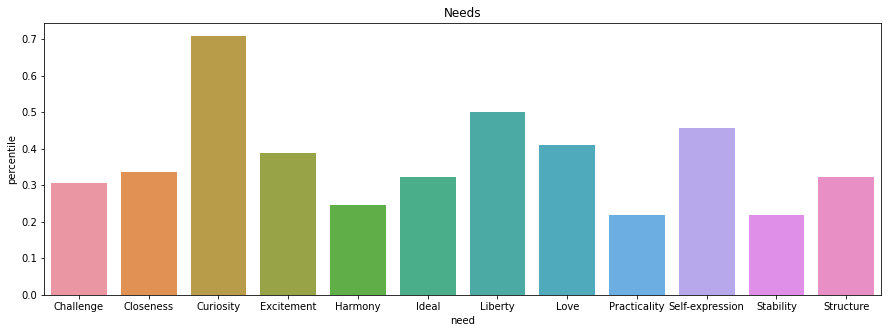

In [25]:
plt.figure(figsize=(15,5))
sns.barplot(y='percentile', x='need', data=df).set_title('Needs')
plt.show()
